In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from plot import experiment

# <0518

# Positional

## Decay Setting

### draft

### Plot

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo 

Merge Sort 11.440272166666666 0.0008407547039548586
Quick Sort 24.8307481 0.7178616646638984
Tim Sort 12.505075433333333 0.002894850919400782
OESM 10.1122131 0.003957014466741308
Cook-Kim Sort 13.126004666666667 0.00823710346474347
Displacement Sort 8.3133964 0.0053480571462915395
Two-sided Sort 6.344420666666667 0.0019155344133919624


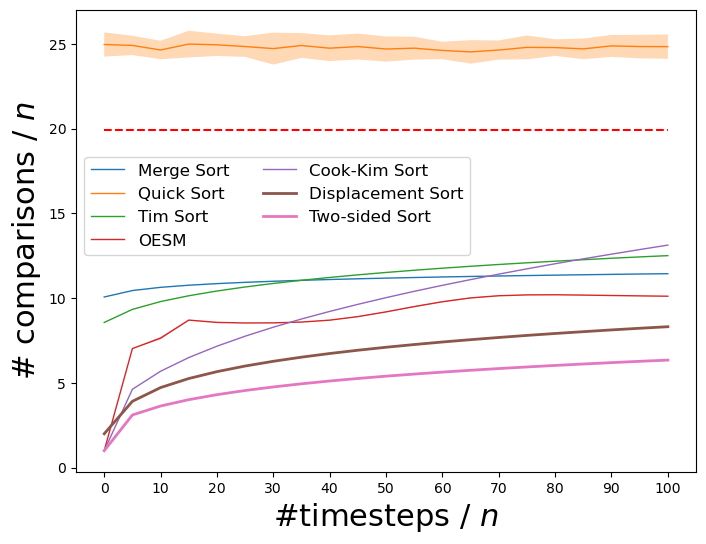

In [21]:
experiment("p", "decay2", 1000000, 30, exclude = ['LIS'], target =  ['Displacement Sort', 'Two-sided Sort'])

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo 

Merge Sort 9.823770666666666 0.0030945844452670685
Quick Sort 20.271176 0.671590273066349
Tim Sort 11.262845 0.009555986518059417
OESM 9.672448333333334 0.025730382052265677
Cook-Kim Sort 13.264539333333333 0.03176886126731996
Displacement Sort 8.400297333333333 0.019160447443163274
Two-sided Sort 6.411644666666667 0.009553778217135994


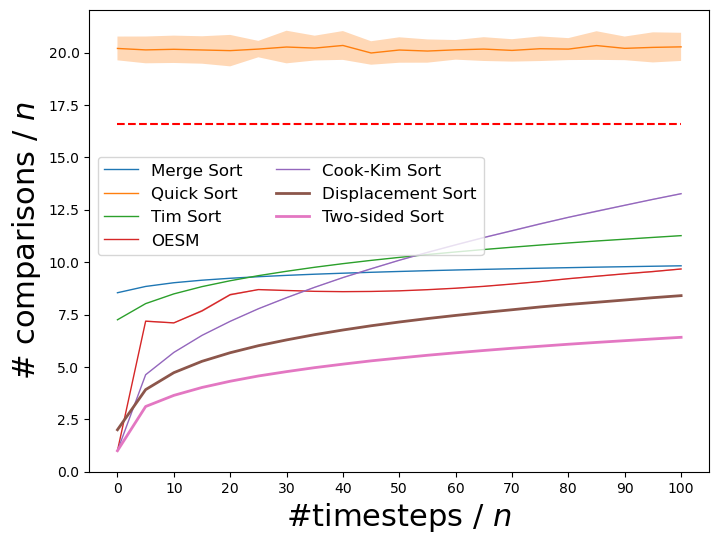

In [26]:
experiment("p", "decay2", 100000, 30, exclude = ['LIS'], target =  ['Displacement Sort', 'Two-sided Sort'])

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo 

Merge Sort 8.171803333333335 0.009785175295085703
Quick Sort 15.802753333333333 0.7522962668759932
Tim Sort 9.652660000000001 0.03294556722838446
OESM 8.641996666666666 0.014729392006762834
Cook-Kim Sort 12.78247 0.1222787857043622
Displacement Sort 8.359973333333334 0.05481448064963207
Two-sided Sort 6.41421 0.028983965107164573


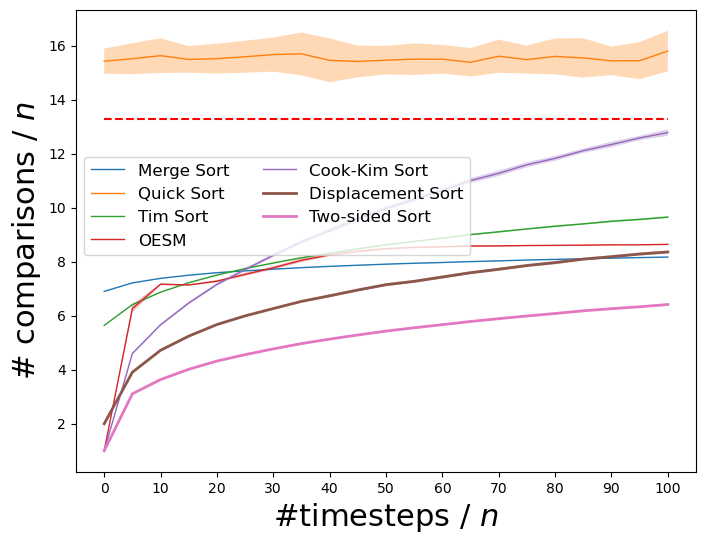

In [27]:
experiment("p", "decay2", 10000, 30, exclude = ['LIS'], target =  ['Displacement Sort', 'Two-sided Sort'])

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo 

Merge Sort 6.485166666666667 0.041006571289110345
Quick Sort 10.833333333333334 0.6682267246642831
Tim Sort 7.666666666666667 0.12464839438284885
OESM 7.1199666666666666 0.022673748893574895
Cook-Kim Sort 11.620233333333333 0.21100516318064091
Displacement Sort 8.5372 0.23190089837399652
Two-sided Sort 6.604966666666666 0.1152205083982689


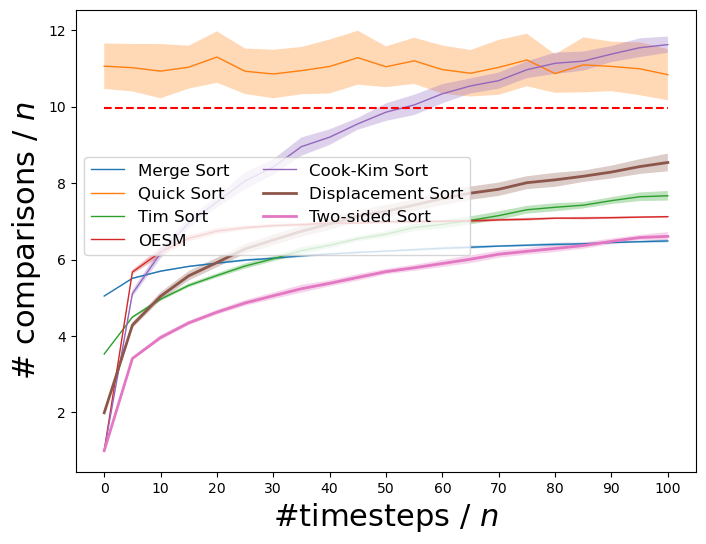

In [28]:
experiment("p", "decay2", 1000, 30, exclude = ['LIS'], target =  ['Displacement Sort', 'Two-sided Sort'])

## Bad Setting

In [61]:
setting = 'bad'

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small              



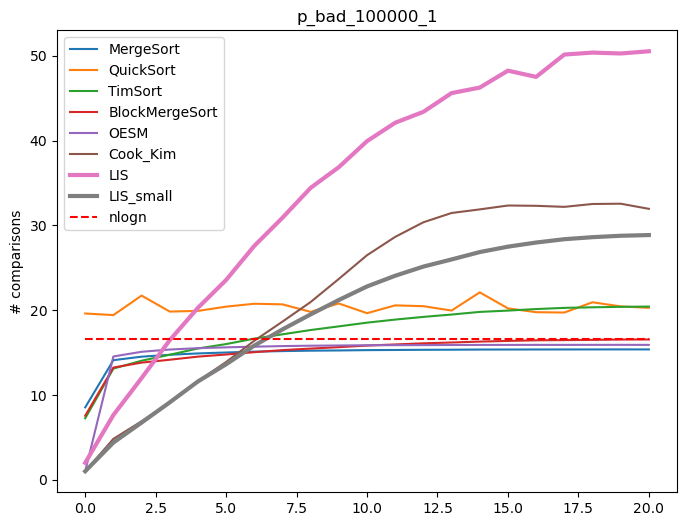

In [63]:
# 1.25
experiment(type_pred, setting, 100000, 1, exclude = [], target = target)

## country setting

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo LIS_small BothAlgo_small 

Merge Sort 5.787072243346008 0.0
Quick Sort 8.249771863117871 0.564876393783261
Tim Sort 8.520912547528518 0.0
OESM 6.186311787072244 0.0
Cook-Kim Sort 10.608365019011407 0.0
Displacement Sort 7.4562737642585555 0.0
Two-sided Sort 7.083650190114068 0.0
Displacement Sort 7.266159695817491 0.0
Two-sided Sort 5.847908745247148 0.0


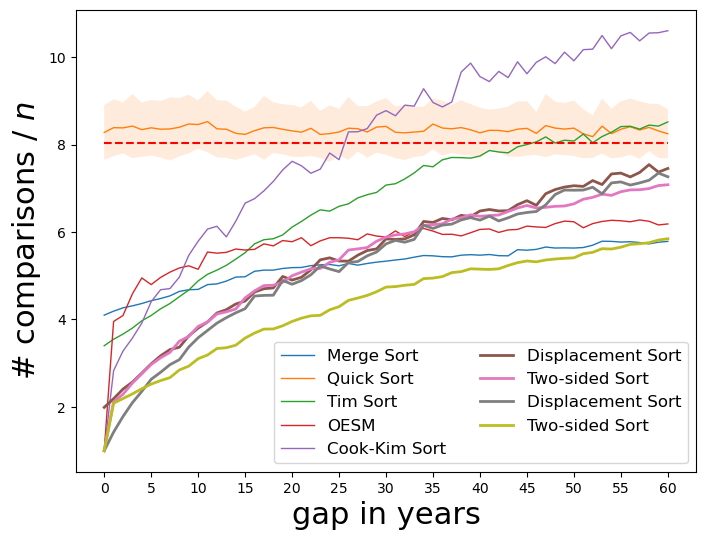

In [75]:
experiment("p", "c", 263, 100, exclude = ["LIS_treap", "", ""], target =  ['Displacement Sort', 'Two-sided Sort'])

## class Setting

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo 

Merge Sort 10.187606466666667 0.0003354559815468426
Quick Sort 25.0691132 0.868672234446664
Tim Sort 8.818611833333334 0.0006792620055782764
OESM 7.2021625 0.0473240930568141
Cook-Kim Sort 3.3314118666666666 0.0022697111818222354
Displacement Sort 2.685236466666667 0.0021643180101105497
Two-sided Sort 2.4190031333333333 0.0009308884907561283


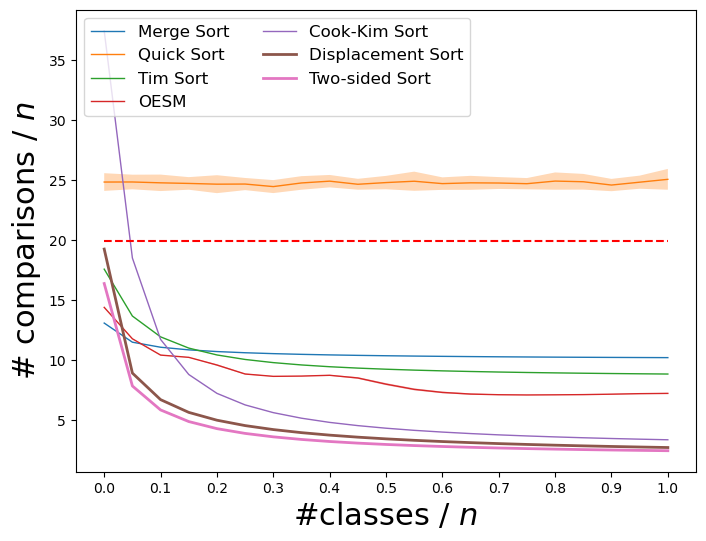

In [34]:
experiment("p", "local", 1000000, 30, exclude = ['LIS'], target =  ['Displacement Sort', 'Two-sided Sort'])

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo 

Merge Sort 8.628249333333333 0.0010348910839095848
Quick Sort 20.328939333333334 0.6735428327727611
Tim Sort 7.502838333333334 0.0018171536044655726
OESM 6.100087666666667 0.15390367047135542
Cook-Kim Sort 3.3287043333333335 0.006359916500150681
Displacement Sort 2.684412 0.007158182916541507
Two-sided Sort 2.4187143333333334 0.0026526485925496344


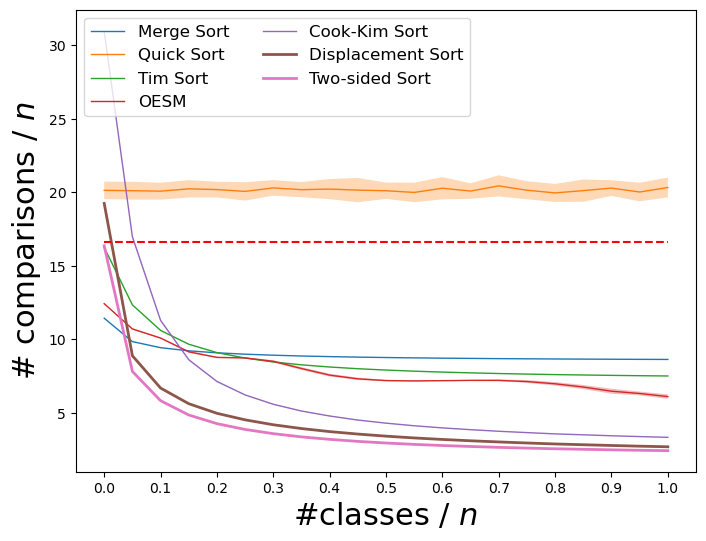

In [35]:
experiment("p", "local", 100000, 30, exclude = ['LIS'], target =  ['Displacement Sort', 'Two-sided Sort'])

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo 

Merge Sort 6.99678 0.0029326211256598873
Quick Sort 15.492803333333333 0.5897617103448551
Tim Sort 5.8919 0.006561300684061558
OESM 5.682893333333333 0.06412462830734815
Cook-Kim Sort 3.320486666666667 0.027388619696671265
Displacement Sort 2.6807133333333333 0.02241029128671815
Two-sided Sort 2.4148233333333335 0.011198591677329589


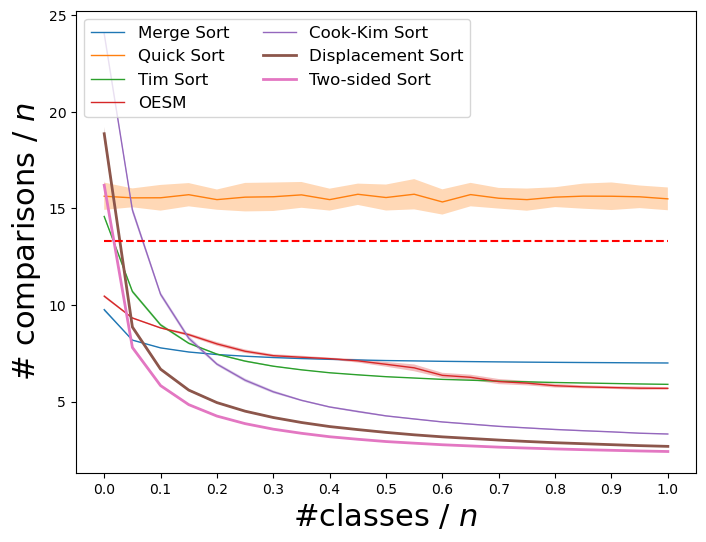

In [36]:
experiment("p", "local", 10000, 30, exclude = ['LIS'], target =  ['Displacement Sort', 'Two-sided Sort'])

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo 

Merge Sort 5.206566666666666 0.01564967163304784
Quick Sort 10.979033333333334 0.6713725485070781
Tim Sort 3.8754333333333335 0.025526043345745708
OESM 4.986833333333333 0.2915705841739793
Cook-Kim Sort 3.6742 0.08458108535600616
Displacement Sort 2.948733333333333 0.07557906823688393
Two-sided Sort 2.6173333333333333 0.044892711608406494


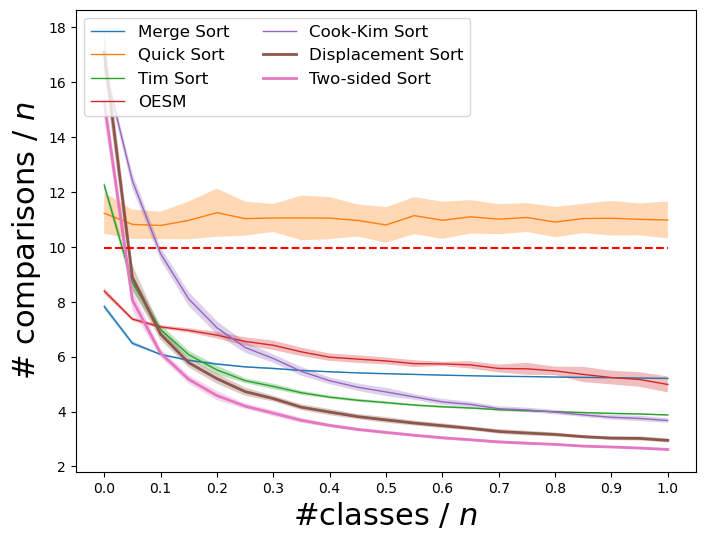

In [37]:
experiment("p", "local", 1000, 30, exclude = ['LIS'], target =  ['Displacement Sort', 'Two-sided Sort'])

MergeSort QuickSort TimSort OESM Cook_Kim LIS BothAlgo 



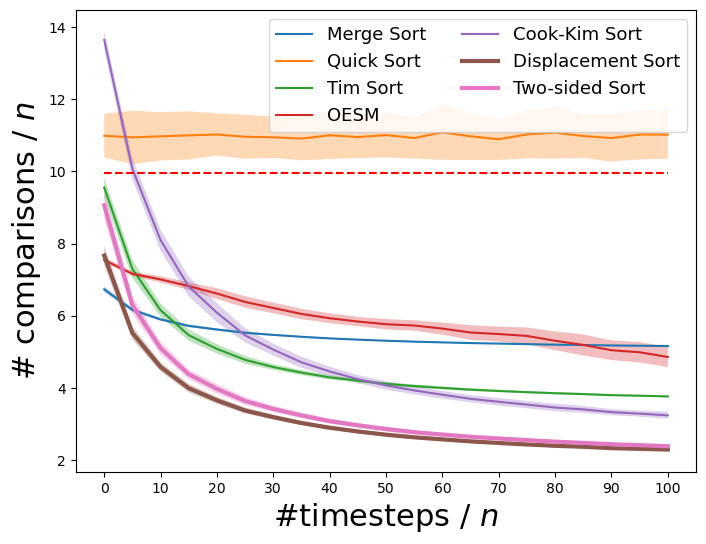

In [40]:
experiment("p", "local", 1000, 101, exclude = ['LIS_treap'], target =  ['Displacement Sort', 'Two-sided Sort'])

MergeSort QuickSort TimSort OESM Cook_Kim LIS BothAlgo 



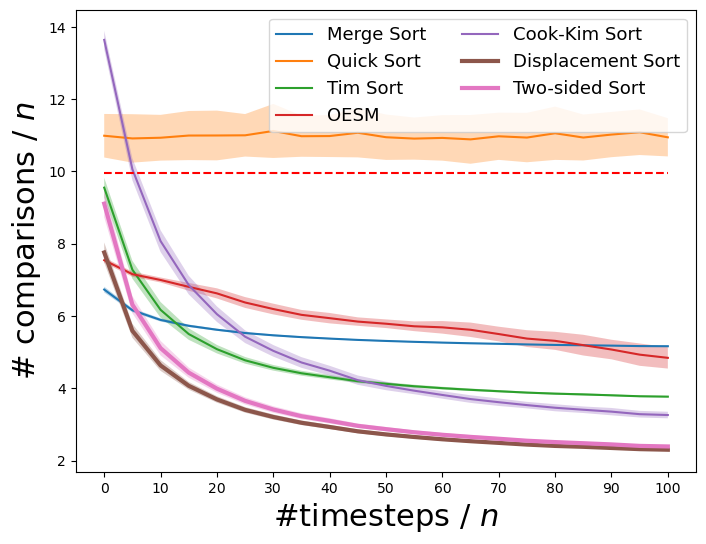

In [41]:
experiment("p", "local", 1000, 102, exclude = ['LIS_treap'], target =  ['Displacement Sort', 'Two-sided Sort'])

### plot

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo 



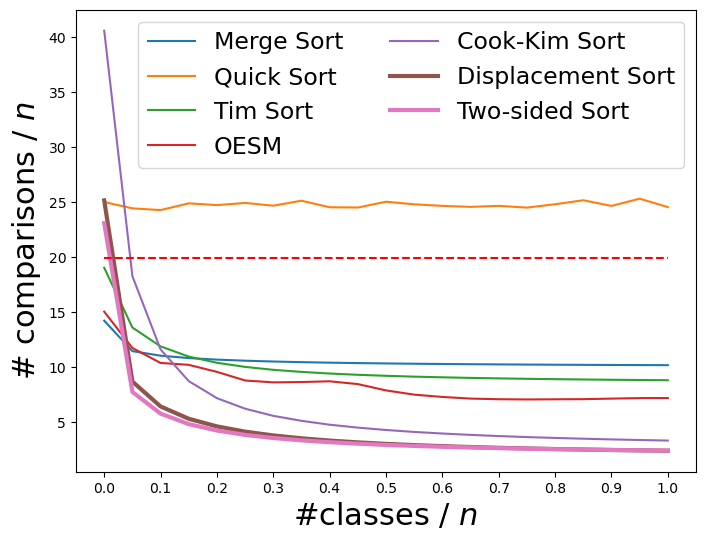

In [11]:
experiment("p", "local", 1000000, 10, exclude = ['LIS_treap'], target =  ['Displacement Sort', 'Two-sided Sort'])

# Relaitonal

## Goodbad

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo DirtyClean2 

Merge Sort 15.363818 0.0017434743091501715
Quick Sort 20.167743666666667 0.6224797075165495
Tim Sort 20.486324333333332 0.016382243575150373
OESM 15.909560666666666 0.001962268981448659
Cook-Kim Sort 32.307399 0.1960544131161891
Displacement Sort 50.597939000000004 0.6329925277987095
Two-sided Sort 41.11395366666667 0.06963842279868844
Dirty-Clean Sort 22.171582333333333 0.046061242976667006


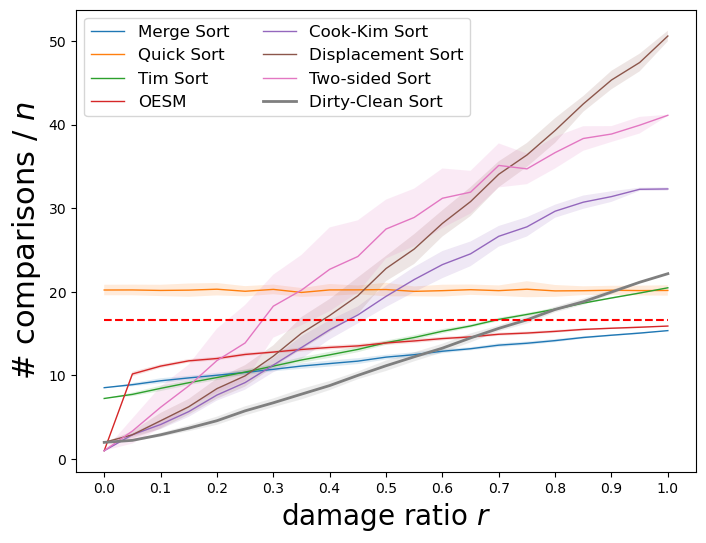

In [72]:
experiment("r", 'gb', 100000, 30, exclude = ["LIS_small", "BothAlgo_small", "DirtyClean2_freeze", "LIS"], target = ["Dirty-Clean Sort"])

## badgood

MergeSort QuickSort TimSort OESM Cook_Kim LIS LIS_treap BothAlgo DirtyClean2 

Merge Sort 11.967633333333334 0.006683678295336749
Quick Sort 15.482426666666667 0.764134907780615
Tim Sort 16.62088 0.08275473561474694
OESM 12.571 0.01162996130690038
Cook-Kim Sort 25.050896666666667 0.13972025499388252
Displacement Sort 33.94107 0.48192964572988584
Two-sided Sort 29.284763333333338 0.28078455855374634
Dirty-Clean Sort 16.649206666666668 0.07468583950269436


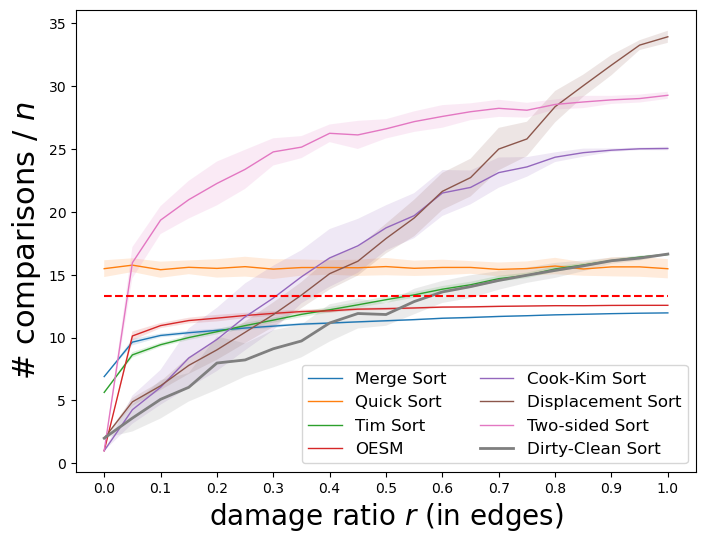

In [79]:
experiment("r", 'bg', 10000, 30, exclude = ["LIS_small", "BothAlgo_small", "DirtyClean2_freeze", "LIS"], target = ["Dirty-Clean Sort"])